In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:

from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Mineria_de_datos/NetflixOriginals_limpiosyseguros.csv"
data = pd.read_csv(ruta, encoding= "latin1")


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [90]:
print(data.shape)
data.head()

(71, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,08-05-19,58,2.5,English/Japanese
1,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English
2,After the Raid,Documentary,"December 19, 2019",25,4.3,ESP
3,After Maria,Documentary,"May 24, 2019",37,4.6,English/ESP
4,Porta dos Fundos: The First Temptation of Christ,Comedy,"December 3, 2019",46,4.6,Portuguese


In [91]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       71 non-null     object 
 1   Genre       71 non-null     object 
 2   Premiere    71 non-null     object 
 3   Runtime     71 non-null     int64  
 4   IMDB Score  71 non-null     float64
 5   Language    71 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.5+ KB


In [92]:
col_cat = ['Title', 'Genre',  'Premiere', 'Language']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(20,500))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [93]:
data.drop(columns=['Premiere'],inplace=True)
data.columns

Index(['Title', 'Genre', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [94]:
data.describe()

,Runtime,IMDB Score
count,71.000000,71.000000
mean,34.366197,6.525352
std,15.223327,0.970967
min,4.000000,2.500000
25%,23.000000,6.300000
50%,36.000000,6.800000
75%,46.500000,7.100000
max,60.000000,8.300000


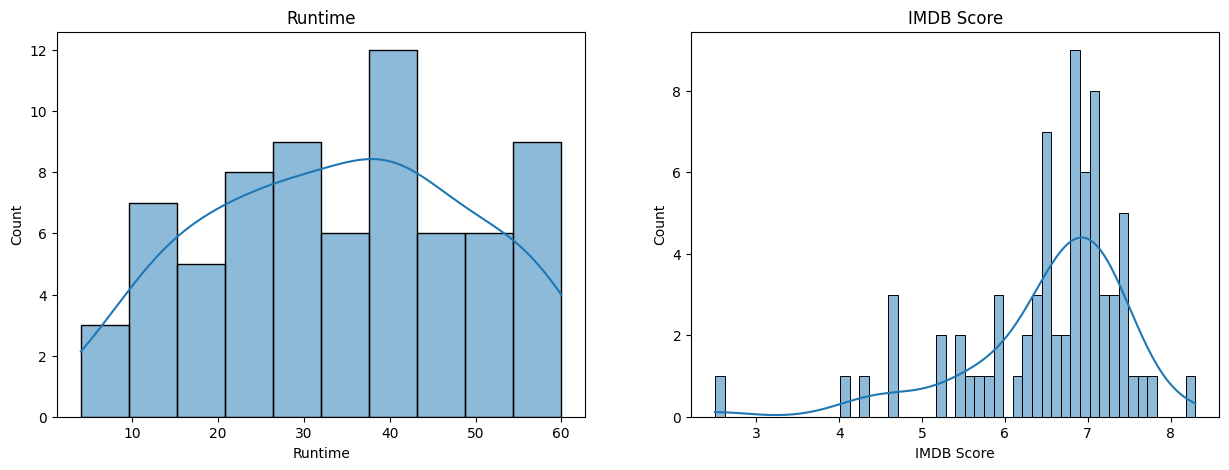

In [73]:
col_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Runtime':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [95]:
data['IMDB Score'].describe()

count    71.000000
mean      6.525352
std       0.970967
min       2.500000
25%       6.300000
50%       6.800000
75%       7.100000
max       8.300000
Name: IMDB Score, dtype: float64

observacion:
la mayor parte de los usuarios dan una calificacion 7

In [96]:

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

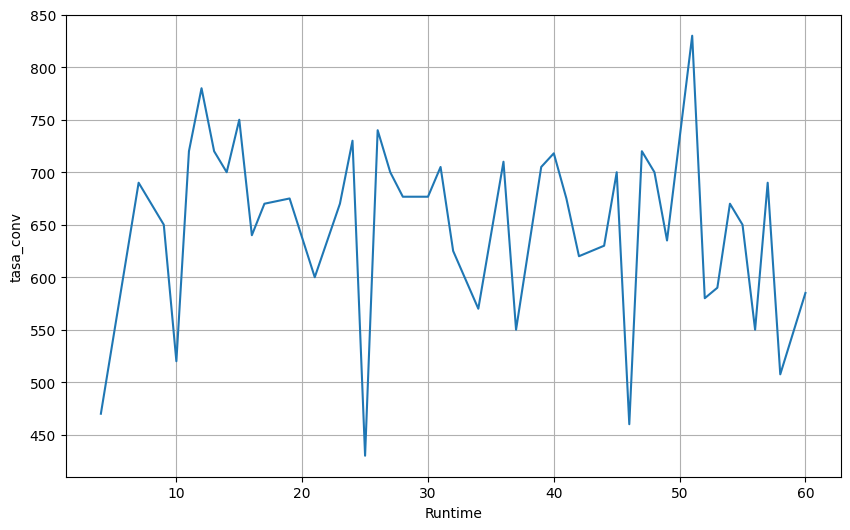

In [97]:
graficar_tasas_conversion('Runtime','IMDB Score')

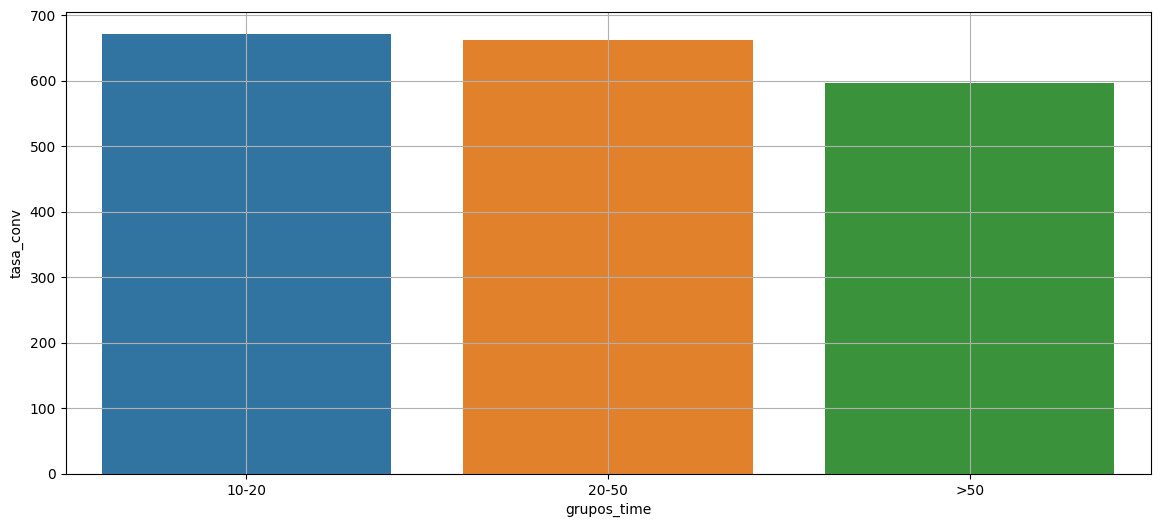

In [98]:

# Nueva columna en el dataset: "grupos_edad"
data.loc[:,'grupos_time'] = "10-20"
data.loc[data['Runtime']>50,'grupos_time'] = ">50"
data.loc[(data['Runtime']>20)&(data['Runtime']<=50), 'grupos_time'] = "20-50"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_time','IMDB Score',type='bar')

In [99]:
data.drop(columns=['Runtime'], inplace=True)

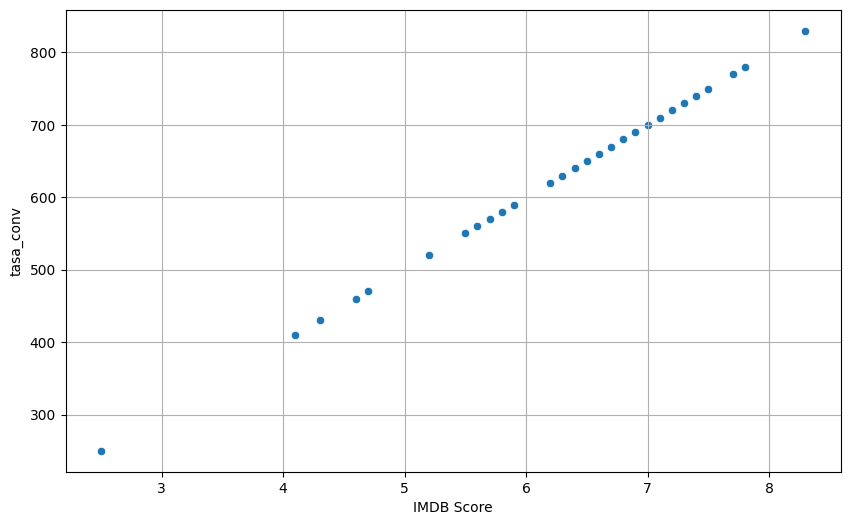

In [100]:
graficar_tasas_conversion('IMDB Score','IMDB Score',type='scatter')

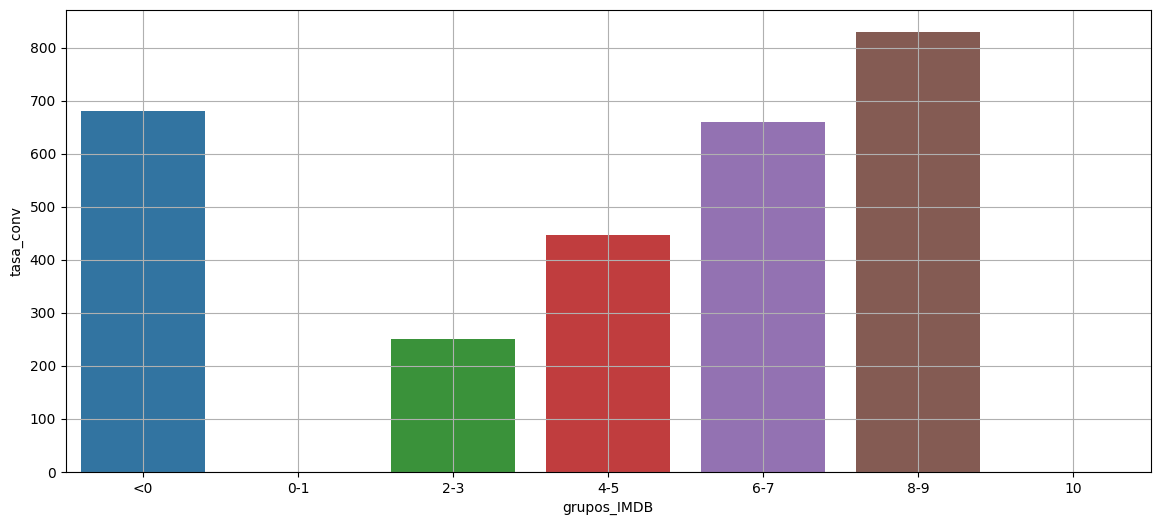

In [101]:
data.loc[:,'grupos_IMDB'] = "<0"
data.loc[(data['IMDB Score']>=0) & (data['IMDB Score']<1),'grupos_IMDB'] = "0-1"
data.loc[(data['IMDB Score']>=2) & (data['IMDB Score']<3),'grupos_IMDB'] = "2-3"
data.loc[(data['IMDB Score']>=4) & (data['IMDB Score']<5),'grupos_IMDB'] = "4-5"
data.loc[(data['IMDB Score']>=6) & (data['IMDB Score']<7),'grupos_IMDB'] = "6-7"
data.loc[(data['IMDB Score']>=8) & (data['IMDB Score']<9),'grupos_IMDB'] = "8-9"
data.loc[data['IMDB Score']>=10,'grupos_IMDB'] = "10"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<0', '0-1', '2-3', '4-5', '6-7', '8-9', '10']
graficar_tasas_conversion('grupos_IMDB','IMDB Score',type='bar', order=orden)

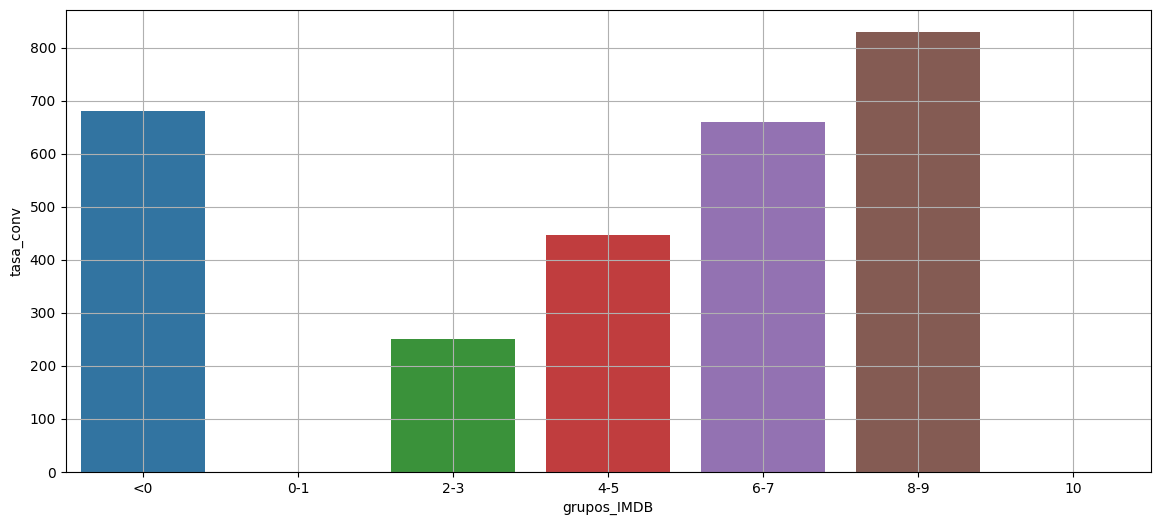

In [102]:
data.loc[:,'grupos_IMDB'] = "<0"
data.loc[(data['IMDB Score']>=0) & (data['IMDB Score']<1),'grupos_IMDB'] = "0-1"
data.loc[(data['IMDB Score']>=2) & (data['IMDB Score']<3),'grupos_IMDB'] = "2-3"
data.loc[(data['IMDB Score']>=4) & (data['IMDB Score']<5),'grupos_IMDB'] = "4-5"
data.loc[(data['IMDB Score']>=6) & (data['IMDB Score']<7),'grupos_IMDB'] = "6-7"
data.loc[(data['IMDB Score']>=8) & (data['IMDB Score']<9),'grupos_IMDB'] = "8-9"
data.loc[data['IMDB Score']>=10,'grupos_IMDB'] = "10"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<0', '0-1', '2-3', '4-5', '6-7', '8-9', '10']
graficar_tasas_conversion('grupos_IMDB','IMDB Score',type='bar', order=orden)

In [103]:
data.drop(columns=['IMDB Score'], inplace=True)